In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Загрузка файла и первичная обработка данных (на примере спектра К)

In [2]:
#загружаем файл так, чтобы первая строка не попала в заголовок
data_k = pd.read_csv("k.mdb.csv", header=None)

In [3]:
#в экселевской таблицы строки со значениеями измерений идут через одну, удаляем ненужные строки
df_k = data_k.iloc[1::2].reset_index(drop=True) 

In [4]:
#в изначальном файле значения записаны в одну строку через пробел, разобьем строку на отдельные значения 
#и добавим каждое отдельное измерение в отдельный столбец (столбец - канал)
df_k = df_k[0].str.split(' ', expand=True) 

In [5]:
#удаляем из таблицы столбцы SPCH 131 0 0 1234 spectre_type{5} и последний столбец, который был пустым
df_k = df_k.iloc[:, 6:1030]

In [6]:
#суммируем измерения для каждого канала (столбца таблицы) и переводим в лог-масштаб для построения графика
sum_df_k = df_k.astype(float).sum()
sum_df_k_log = np.log(sum_df_k)

C:\Users\Настя\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Интенсивность, у. е.')

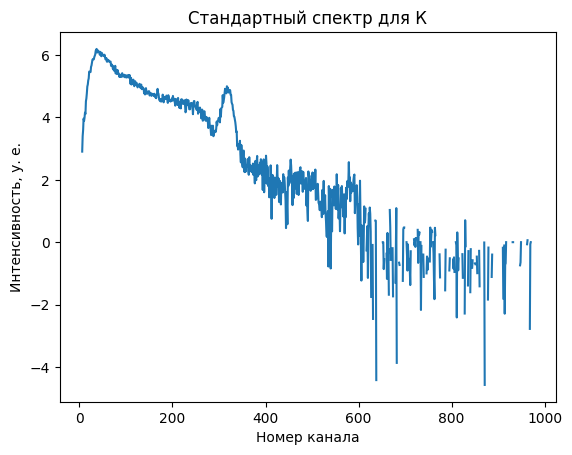

In [7]:
sum_df_k_log.plot()  
plt.title('Стандартный спектр для К')  
plt.xlabel('Номер канала')  
plt.ylabel('Интенсивность, у. е.')  

## Загружаем данные для U

In [8]:
data_u = pd.read_csv("u.mdb.csv", header=None)
df_u = data_u.iloc[1::2].reset_index(drop=True)
df_u = df_u[0].str.split(' ', expand=True)
df_u = df_u.iloc[:, 6:1030]
sum_df_u = df_u.astype(float).sum() 
sum_df_u_log = np.log(sum_df_u)

C:\Users\Настя\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Интенсивность, у. е.')

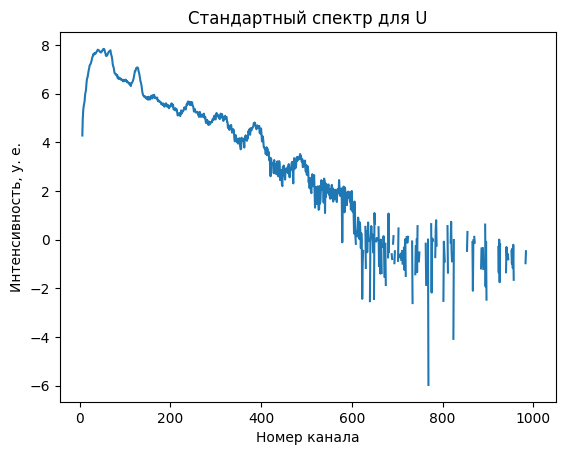

In [9]:
sum_df_u_log.plot()  
plt.title('Стандартный спектр для U')  
plt.xlabel('Номер канала')  
plt.ylabel('Интенсивность, у. е.')

## Загружаем данные для Th

In [10]:
data_th = pd.read_csv("th.mdb.csv", header=None)
df_th = data_th.iloc[1::2].reset_index(drop=True)
df_th = df_th[0].str.split(' ', expand=True)
df_th = df_th.iloc[:, 6:1030]
sum_df_th = df_th.astype(float).sum()
sum_df_th_log = np.log(sum_df_th)

C:\Users\Настя\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Интенсивность, у. е.')

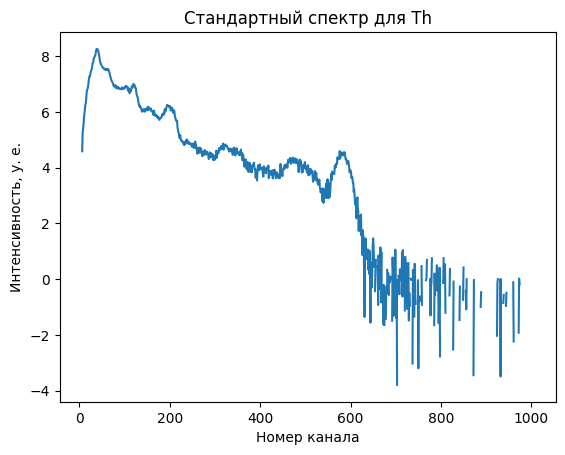

In [11]:
sum_df_th_log.plot()  
plt.title('Стандартный спектр для Th')  
plt.xlabel('Номер канала')  
plt.ylabel('Интенсивность, у. е.')

## Загружаем данные для образца

In [12]:
data_quest = pd.read_csv("quest.mdb.csv", header=None)
df_quest = data_quest.iloc[1::2].reset_index(drop=True)
df_quest = df_quest[0].str.split(' ', expand=True)
df_quest = df_quest.iloc[:, 6:1030]
df_quest = df_quest.astype(float)

In [13]:
sum_df_quest = df_quest.sum() 
sum_df_quest_log = np.log(sum_df_quest)

C:\Users\Настя\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


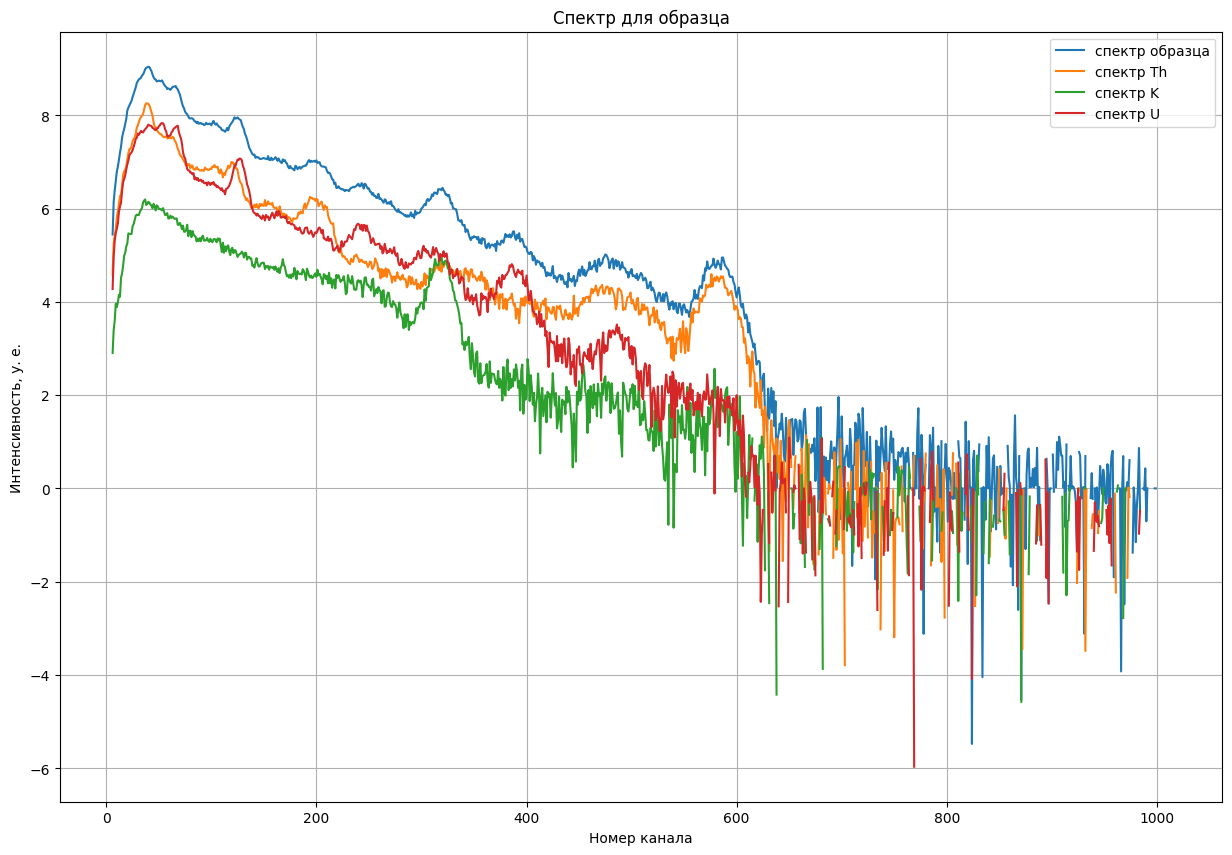

In [14]:
plt.figure(figsize=(15,10))
sum_df_quest_log.plot(label='спектр образца')
sum_df_th_log.plot(label='спектр Th')
sum_df_k_log.plot(label='спектр K')
sum_df_u_log.plot(label='спектр U')
plt.legend()
plt.title('Cпектр для образца')  
plt.xlabel('Номер канала')  
plt.ylabel('Интенсивность, у. е.')
plt.grid()

## Рассчитаем концентрации K, U, Th методом наименьшим квадратов
Ω = s * c, где Ω – измеренный спектр (вектор-столбец [1,n]); S – элементарные спектры K, Th, U (матрица [3,n]); C – концентрации K,Th,U (вектор-столбец [1,3]). 

Решение данной системы можно получить методом наименьших квадратов:
$$C=(S^Т S)^(-1) (S^T Ω)$$



In [15]:
s = np.array([sum_df_k, sum_df_u, sum_df_th]).T #транспонируем, чтобы получить правильную размерность

In [16]:
omega = np.array(df_quest).T #транспонируем, чтобы получить правильную размерность

In [17]:
c = np.linalg.pinv(s) @ omega

In [18]:
#транспонируем матрицу с, чтобы получить правильную размерность, и записываем концентрации каждого спектра в отдельную переменную для построения графика
c = c.T
k_conc = c[:, 0]
u_conc = c[:, 1]
th_con = c[:, 2]

## Построим график концентраций всех элементов (красные вертикальные линии - границы образцов по 12 см)

Text(0, 0.5, 'Концентрация')

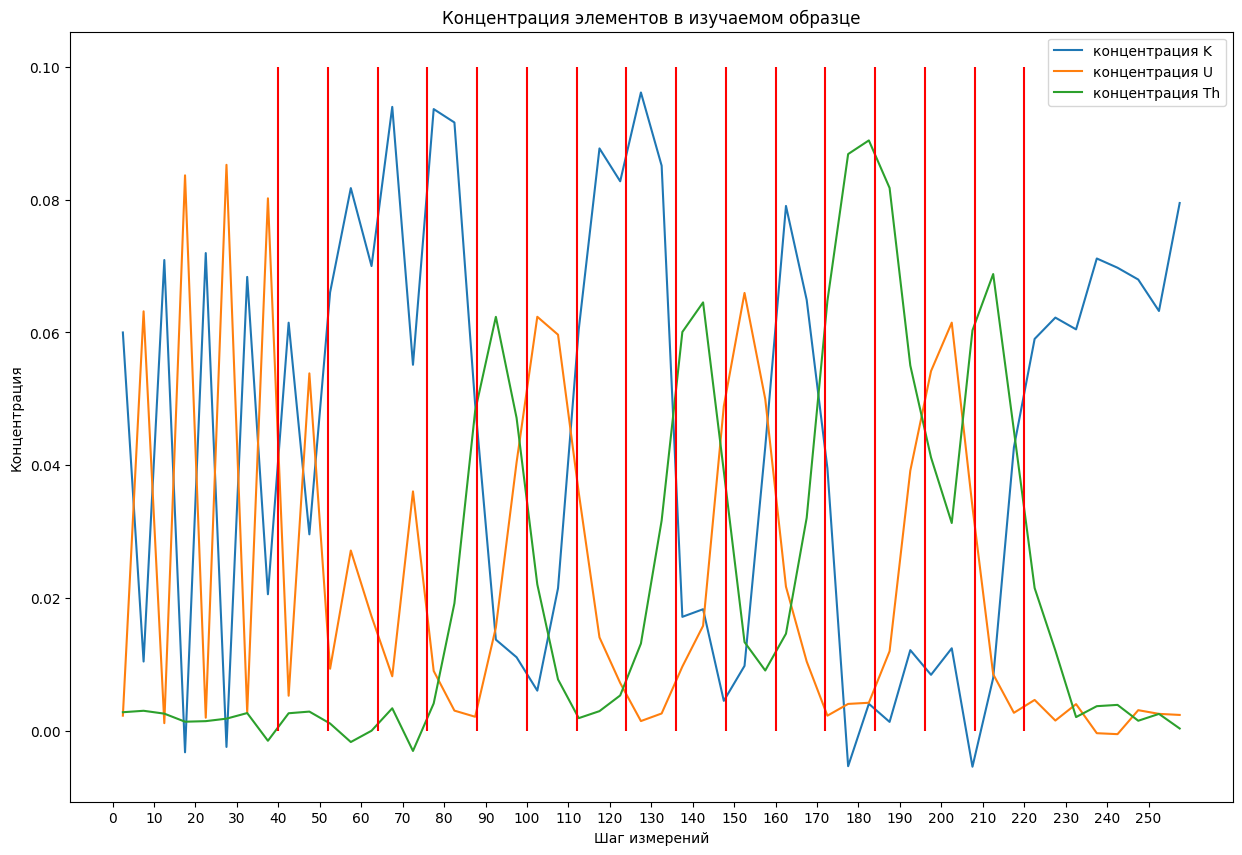

In [19]:
plt.figure(figsize=(15,10))
x = np.arange(2.5, 260, 5)
plt.plot(x, k_conc, label='концентрация K')
plt.plot(x, u_conc, label='концентрация U')
plt.plot(x, th_con, label='концентрация Th')

plt.vlines(
    x=np.arange(40, 221, 12),  
    colors='red',
    ymin=-0.0001, ymax=0.1
    )
plt.xticks(np.arange(0, 260, 10))
plt.legend()
plt.title('Концентрация элементов в изучаемом образце')  
plt.xlabel('Шаг измерений')  
plt.ylabel('Концентрация')

In [20]:
#создадим датафрейм с значениеями концентраций на каждом шаге квантования
concentration = pd.DataFrame({
    'K': k_conc,
    'U': u_conc,
    'Th': th_con
}, index=x)

In [21]:
#для каждого шага квантования выведем элемент с максимальной концентрацией
max_concentration = pd.DataFrame({
    'Элемент': concentration.idxmax(axis=1),
    'Концентрация': concentration.max(axis=1)
}, index=x)

In [22]:
#рассмотрим интервал от 40 до 220 см, так как измерение началось и закончилось на расстоянии 40 см от группы образцов
samples_depths = np.arange(40, 220, 12)
#создадим список-последовательность расположения элементов: в заданных диапазонах длиной по 12 см выберем элемент, который встречается чаще всего
el_order = [max_concentration.loc[(max_concentration.index >= depth) & (max_concentration.index < depth + 12)]['Элемент'].mode()[0] for depth in samples_depths]
depth = [f'{depth}-{depth+12}' for depth in samples_depths] #переменная, чтобы красиво записать значения глубин в итогов датафрейме

## Порядок расположения образцов

In [23]:
samples_order = pd.DataFrame({
    'Элемент': el_order,
    "Глубина": depth  
})
samples_order

,Элемент,Глубина
0,K,40-52
1,K,52-64
2,K,64-76
3,K,76-88
4,Th,88-100
5,U,100-112
6,K,112-124
7,K,124-136
8,Th,136-148
9,U,148-160
